### NOTE: look up simpleitk for 3d flood fill capability in python

In [1]:
from MHW_daily_calcs import *
import matplotlib.pyplot as plt
import cmocean
import itertools

SEDI was higher, particularly for tropical Pacific, when no smoothing was applied. Try to identify cause. First, compare detrended anomaly time series.

In [2]:
climyrs=[1993,2023]
qtile=0.90
detr=True
#smoothClim=True
smoothTrend=True
meth=method
win=halfwin
qtvar='qt1'
delt=15
jj=60
p1=[215,216,80-60,81-60]

In [3]:
fanom=dict()
fMHW=dict()
fQ=dict()
pselect= lambda ds: ds.isel(lat=p1[2],lon=p1[0])
fanom['obs','sm','det']=xr.open_mfdataset([fnameOISSTAnomDetr([ylimlistobs[0][0],ylimlistobs[-1][-1]],climyrs, jj, smoothClim=True, meth=meth, win=win),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fanom['obs','sm','nod']=xr.open_mfdataset([fnameOISSTAnom(yrlims, climyrs, jj, smoothClim=True, meth=meth, win=win) for yrlims in ylimlistobs],
                                     parallel=True,decode_times=False,preprocess=pselect)
fanom['obs','id','det']=xr.open_mfdataset([fnameOISSTAnomDetr([ylimlistobs[0][0],ylimlistobs[-1][-1]],climyrs, jj, smoothClim=False, meth=None, win=1),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fanom['obs','id','nod']=xr.open_mfdataset([fnameOISSTAnom(yrlims, climyrs, jj, smoothClim=False, meth=None, win=1) for yrlims in ylimlistobs],
                                     parallel=True,decode_times=False,preprocess=pselect)
fanom['mod','sm','det']=xr.open_mfdataset([fnameCanESMAnomDetrByLead(workdir, climyrs[0], climyrs[-1], ilead, jj,smoothClim=True,
                                                        smoothTrend=True,meth=meth,win=win) for ilead in range(0,200)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fanom['mod','sm','nod']=xr.open_mfdataset([fnameCanESMAnomByLeadNoDetr(workdir, climyrs[0], climyrs[-1], ilead, jj,smoothClim=True,
                                                                       meth=meth,win=win) for ilead in range(0,200)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fanom['mod','id','det']=xr.open_mfdataset([fnameCanESMAnomDetrByLead(workdir, climyrs[0], climyrs[-1], ilead, jj,smoothClim=False,
                                                        smoothTrend=False,meth=None,win=1) for ilead in range(0,200)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fanom['mod','id','nod']=xr.open_mfdataset([fnameCanESMAnomByLeadNoDetr(workdir, climyrs[0], climyrs[-1], ilead, jj,smoothClim=False,
                                                                       meth=None,win=1) for ilead in range(0,200)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)


In [4]:
fMHW['obs','sm','det']=xr.open_mfdataset([fnameOISSTMHW(climyrs, jj, qtile, smoothClim=True, meth=meth, win=win,detr=True,delt=delt,qtvar='qt1'),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fMHW['obs','sm','nod']=xr.open_mfdataset([fnameOISSTMHW(climyrs, jj, qtile, smoothClim=True, meth=meth, win=win,detr=False,delt=delt,qtvar='qt1'),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fMHW['obs','id','det']=xr.open_mfdataset([fnameOISSTMHW(climyrs, jj, qtile, smoothClim=False, meth=None, win=1,detr=True,delt=delt,qtvar='qt1'),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fMHW['obs','id','nod']=xr.open_mfdataset([fnameOISSTMHW(climyrs, jj, qtile, smoothClim=False, meth=None, win=1,detr=False,delt=delt,qtvar='qt1'),],
                                     parallel=True,decode_times=False,preprocess=pselect)
lmax=100
fMHW['mod','sm','det']=xr.open_mfdataset([fnameCanESMMHW(workdir, climyrs[0], climyrs[-1], ilead, jj,qtile,detrend=True,smoothClim=True,
                                            smoothTrend=True,meth=meth,win=win,delt=delt,qtvar='qt1') for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fMHW['mod','sm','nod']=xr.open_mfdataset([fnameCanESMMHW(workdir, climyrs[0], climyrs[-1], ilead, jj,qtile,detrend=False,smoothClim=True,
                                            smoothTrend=True,meth=meth,win=win,delt=delt,qtvar='qt1') for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fMHW['mod','id','det']=xr.open_mfdataset([fnameCanESMMHW(workdir, climyrs[0], climyrs[-1], ilead, jj,qtile,detrend=True,smoothClim=False,
                                            smoothTrend=False,meth=None,win=1,delt=delt,qtvar='qt1') for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fMHW['mod','id','nod']=xr.open_mfdataset([fnameCanESMMHW(workdir, climyrs[0], climyrs[-1], ilead, jj,qtile,detrend=False,smoothClim=False,
                                            smoothTrend=False,meth=None,win=1,delt=delt,qtvar='qt1')  for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)

In [5]:
fQ['obs','sm','det']=xr.open_mfdataset([fnameOISSTQTile(climyrs, jj, qtile, smoothClim=True, meth=meth, win=win,detr=True,delt=delt),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fQ['obs','sm','nod']=xr.open_mfdataset([fnameOISSTQTile(climyrs, jj, qtile, smoothClim=True, meth=meth, win=win,detr=False,delt=delt),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fQ['obs','id','det']=xr.open_mfdataset([fnameOISSTQTile(climyrs, jj, qtile, smoothClim=False, meth=None, win=1,detr=True,delt=delt),],
                                     parallel=True,decode_times=False,preprocess=pselect)
fQ['obs','id','nod']=xr.open_mfdataset([fnameOISSTQTile(climyrs, jj, qtile, smoothClim=False, meth=None, win=1,detr=False,delt=delt),],
                                     parallel=True,decode_times=False,preprocess=pselect)
lmax=100
fQ['mod','sm','det']=xr.open_mfdataset([fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile,detrend=True,smoothClim=True,
                                smoothTrend=True,meth=meth,win=win,delt=delt) for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fQ['mod','sm','nod']=xr.open_mfdataset([fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile,detrend=False,smoothClim=True,
                                smoothTrend=True,meth=meth,win=win,delt=delt) for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fQ['mod','id','det']=xr.open_mfdataset([fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile,detrend=True,smoothClim=False,
                                smoothTrend=False,meth=None,win=1,delt=delt) for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)
fQ['mod','id','nod']=xr.open_mfdataset([fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile,detrend=False,smoothClim=False,
                                smoothTrend=False,meth=None,win=1,delt=delt) for ilead in range(0,lmax)],
                                     combine='nested',concat_dim=['lead'],parallel=True,decode_times=False,preprocess=pselect)

In [6]:
sstan=dict()
mhw=dict()
mhwr=dict()
Q=dict()
keylist=[('obs','sm','det'),
         ('obs','sm','nod'),
         ('obs','id','det'),
         ('obs','id','nod'),
         ('mod','sm','det'),
         ('mod','sm','nod'),
         ('mod','id','det'),
         ('mod','id','nod'),]
for key in keylist:
    print(key)
    sstan[key]=fanom[key].sst_an.load()
    mhw[key]=fMHW[key].MHW_prob.load() if key[0]=='mod' else fMHW[key].isMHW.load()
    mhwr[key]=fMHW[key].isMHW.load()
    Q[key]=fQ[key].qt1.load()

('obs', 'sm', 'det')
('obs', 'sm', 'nod')
('obs', 'id', 'det')
('obs', 'id', 'nod')
('mod', 'sm', 'det')
('mod', 'sm', 'nod')
('mod', 'id', 'det')
('mod', 'id', 'nod')


In [7]:
mhwr=dict()
for key in keylist:
    print(key)
    mhwr[key]=fMHW[key].isMHW.load()

('obs', 'sm', 'det')
('obs', 'sm', 'nod')
('obs', 'id', 'det')
('obs', 'id', 'nod')
('mod', 'sm', 'det')
('mod', 'sm', 'nod')
('mod', 'id', 'det')
('mod', 'id', 'nod')


In [8]:
fanom['obs','sm','det'].time
tobs=np.array([dt.datetime(1978,1,1,12)+dt.timedelta(days=float(ii)) for ii in fanom['obs','sm','det'].time.values])
ydobs=np.array([yd365(el) for el in tobs]) # day 366 is returned as 365

In [9]:
tmod_L0=dt.datetime(1993,1,1,0)+np.array([dt.timedelta(days=float(ii)) for ii in fanom['mod','sm','nod'].reftime.values])+\
    dt.timedelta(days=float(fanom['mod','sm','nod'].leadtime.values[0]/24))
tmod_L0[0],tmod_L0[-1]

(datetime.datetime(1993, 1, 1, 15, 0), datetime.datetime(2024, 6, 1, 15, 0))

In [10]:
indobs=np.array([True if (el.year>=1993 and (el.year<2024 or (el.year==2024 and el.month<=6)) and el.day==1) else False for el in tobs])

In [11]:
tobs_L0=tobs[indobs]
tobs_L0[0],tobs_L0[-1]

(datetime.datetime(1993, 1, 1, 12, 0), datetime.datetime(2024, 6, 1, 12, 0))

In [12]:
mhw_L0=dict()
mhw_L0[('obs','sm','det')]=mhw[('obs','sm','det')][indobs]
mhw_L0[('obs','sm','nod')]=mhw[('obs','sm','nod')][indobs]
mhw_L0[('obs','id','det')]=mhw[('obs','id','det')][indobs]
mhw_L0[('obs','id','nod')]=mhw[('obs','id','nod')][indobs]

mhw_L0[('mod','sm','det')]=mhw[('mod','sm','det')][0,:]
mhw_L0[('mod','sm','nod')]=mhw[('mod','sm','nod')][0,:]
mhw_L0[('mod','id','det')]=mhw[('mod','id','det')][0,:]
mhw_L0[('mod','id','nod')]=mhw[('mod','id','nod')][0,:]

In [13]:
an_L0=dict()
an_L0[('obs','sm','det')]=sstan[('obs','sm','det')][indobs]
an_L0[('obs','sm','nod')]=sstan[('obs','sm','nod')][indobs]
an_L0[('obs','id','det')]=sstan[('obs','id','det')][indobs]
an_L0[('obs','id','nod')]=sstan[('obs','id','nod')][indobs]

an_L0[('mod','sm','det')]=sstan[('mod','sm','det')][0,:]
an_L0[('mod','sm','nod')]=sstan[('mod','sm','nod')][0,:]
an_L0[('mod','id','det')]=sstan[('mod','id','det')][0,:]
an_L0[('mod','id','nod')]=sstan[('mod','id','nod')][0,:]

In [14]:
Q[('mod','sm','det')][0,:].values

array([0.68401031, 0.76672894, 0.77839594, 0.70842649, 0.65284323,
       0.63492288, 0.42104047, 0.41038528, 0.54868389, 0.64614706,
       0.66868785, 0.77092733])

In [15]:
Q[('mod','sm','nod')][0,:].values

array([0.67718702, 0.75034872, 0.7688325 , 0.69254608, 0.6655147 ,
       0.64252046, 0.43331952, 0.44102424, 0.54499062, 0.65682998,
       0.68850479, 0.77125164])

In [16]:
Q[('mod','id','det')][0,:].values

array([0.68297743, 0.76791009, 0.77499155, 0.70675561, 0.65368557,
       0.63473756, 0.42272852, 0.41170614, 0.54910214, 0.65043726,
       0.66288646, 0.76920596])

In [17]:
Q[('mod','id','nod')][0,:].values

array([0.67244205, 0.75135705, 0.76917623, 0.69069157, 0.66645139,
       0.64253168, 0.43464869, 0.44243398, 0.54602084, 0.66117171,
       0.6860413 , 0.77049836])

In [18]:
Q_L0=dict()
ydo_0=ydobs[indobs]
Q_L0[('obs','sm','det')]=np.array([Q[('obs','sm','det')][iyd] for iyd in ydo_0])
Q_L0[('obs','sm','nod')]=np.array([Q[('obs','sm','nod')][iyd] for iyd in ydo_0])
Q_L0[('obs','id','det')]=np.array([Q[('obs','id','det')][iyd] for iyd in ydo_0])
Q_L0[('obs','id','nod')]=np.array([Q[('obs','id','nod')][iyd] for iyd in ydo_0])

Q_L0[('mod','sm','det')]=Q[('mod','sm','det')][0,:]
Q_L0[('mod','sm','nod')]=Q[('mod','sm','nod')][0,:]
Q_L0[('mod','id','det')]=Q[('mod','id','det')][0,:]
Q_L0[('mod','id','nod')]=Q[('mod','id','nod')][0,:]

### done load, start fxns

In [19]:
indstarts,indends,MHWdurs=calcdur(mhw['obs','sm','nod'])

In [20]:
indstarts, indends,MHWdurs

(array([   53,    74,    94,   104,   243,   258,   265,   271,   282,
          289,   318,   323,   326,   341,   354,   368,   385,   391,
          393,   414,   419,   433,   461,   464,   476,   481,   494,
          504,   520,   530,   541,   605,   830,   865,   872,   875,
          888,   894,   902,   924,   933,   944,   957,   963,   965,
          986,   989,   993,  1016,  1026,  1029,  1041,  1065,  1073,
         1078,  1115,  1139,  1156,  1167,  1172,  1194,  1206,  1208,
         1217,  1228,  1236,  1245,  1248,  1342,  1359,  1364,  1368,
         1376,  1384,  1402,  1476,  1481,  1493,  1541,  1568,  1587,
         1602,  1610,  1617,  1630,  1654,  1682,  2271,  2341,  2417,
         2420,  2431,  2448,  2474,  2480,  2497,  2502,  2542,  2547,
         2557,  2590,  2593,  2596,  2604,  2612,  2641,  2653,  2660,
         2663,  2680,  2685,  2694,  2699,  2704,  2706,  2710,  2715,
         2722,  2727,  2731,  2739,  2756,  2758,  3368,  3709,  3715,
      

In [21]:
Int=eventIntens(indstarts,indends,[Q['obs','sm','nod'][iyd-1] for iyd in ydobs],sstan['obs','sm','nod'].values)

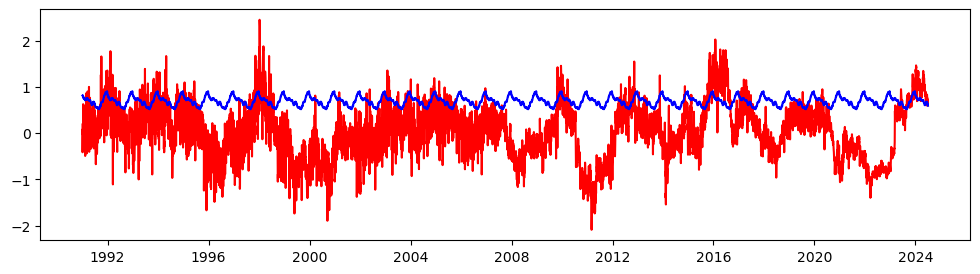

In [22]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tobs,sstan['obs','sm','nod'].values,'r-')
ax.plot(tobs,[Q['obs','sm','nod'][iyd-1] for iyd in ydobs],'b-')

In [23]:
cIntObs=cumEventIntens([Q['obs','sm','nod'][iyd-1] for iyd in ydobs], sstan['obs','sm','nod'].values, mhw['obs','sm','nod'].values)

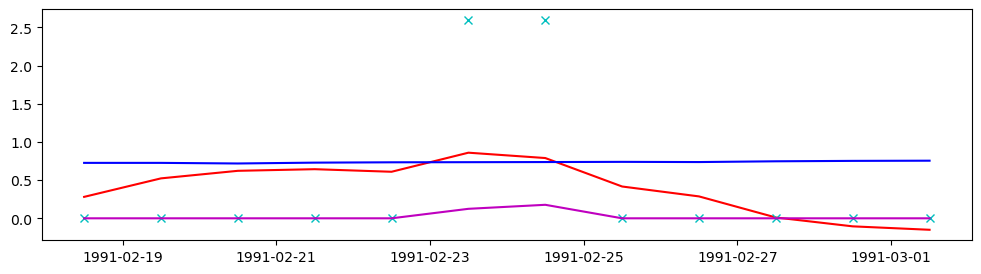

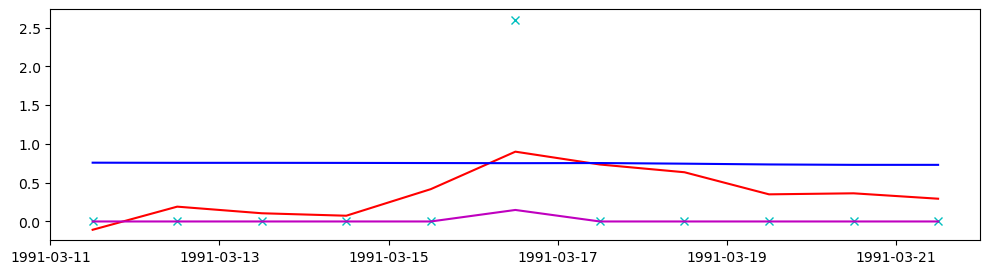

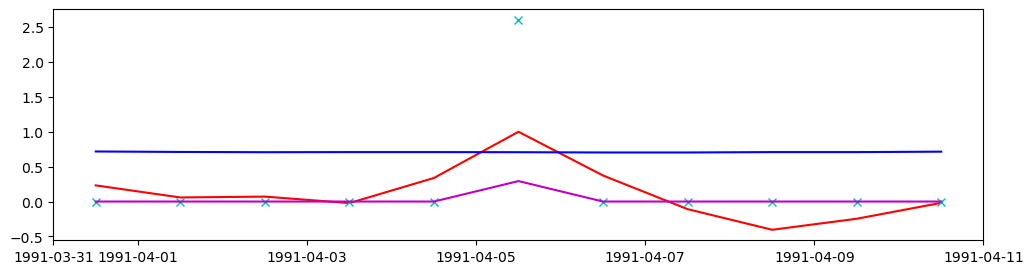

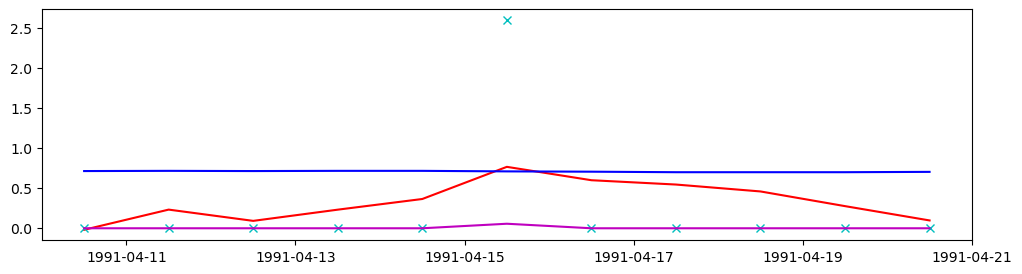

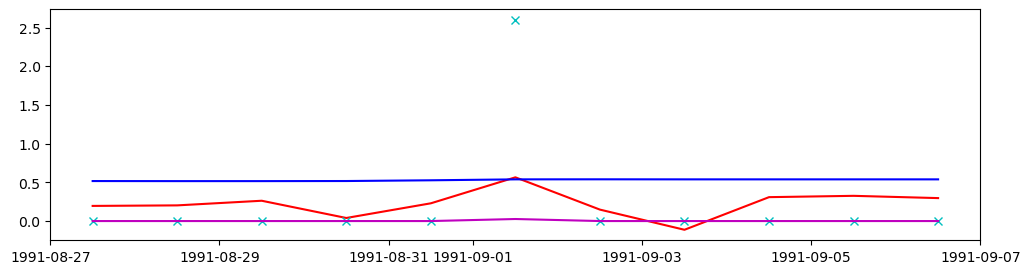

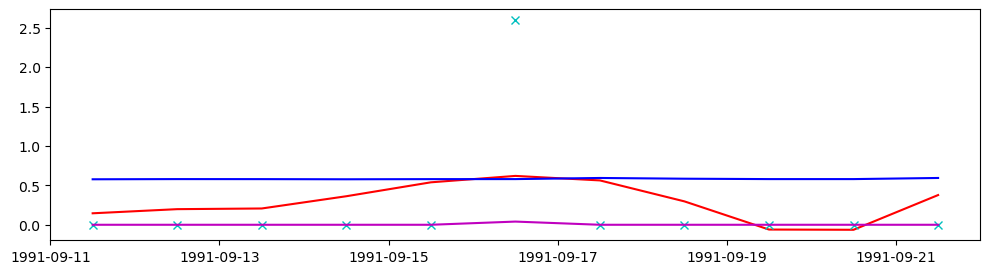

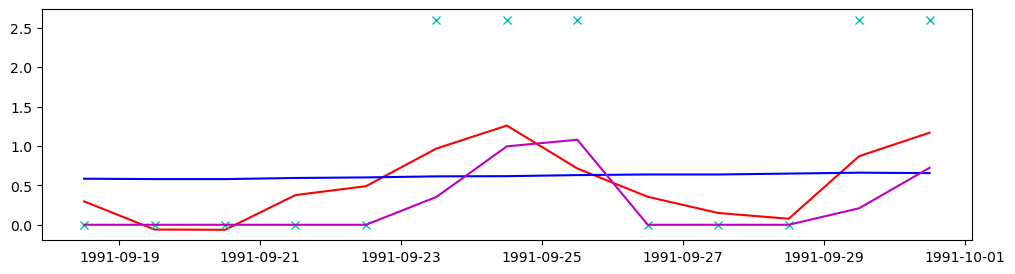

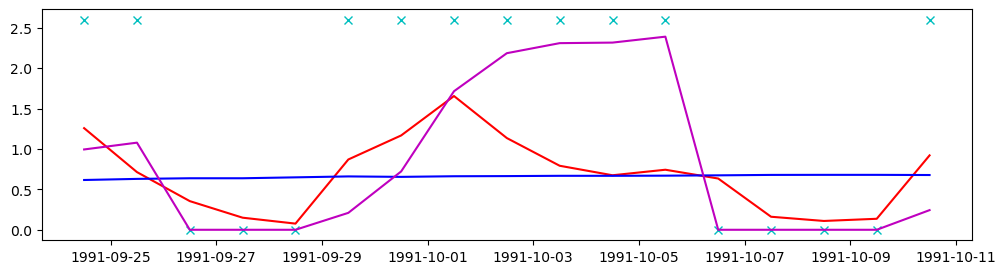

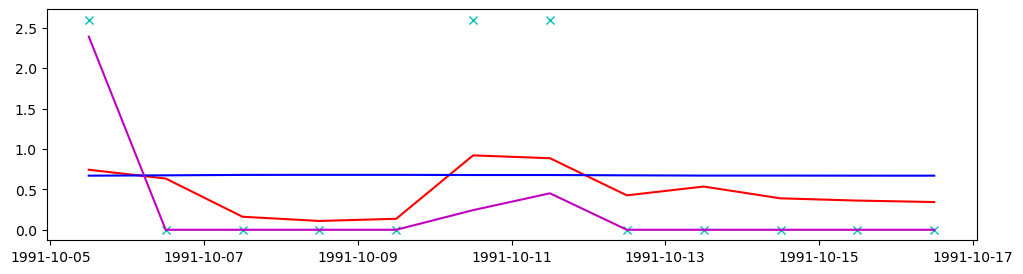

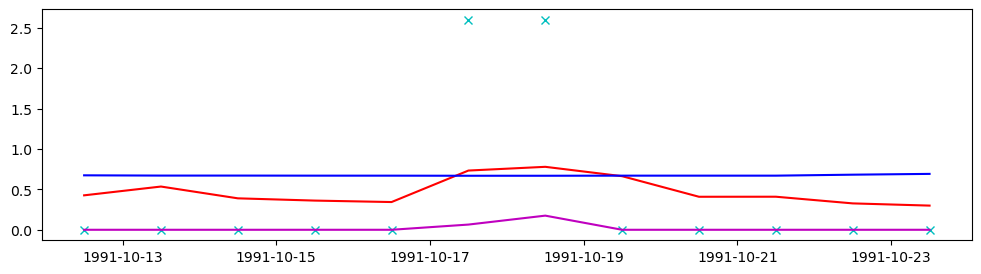

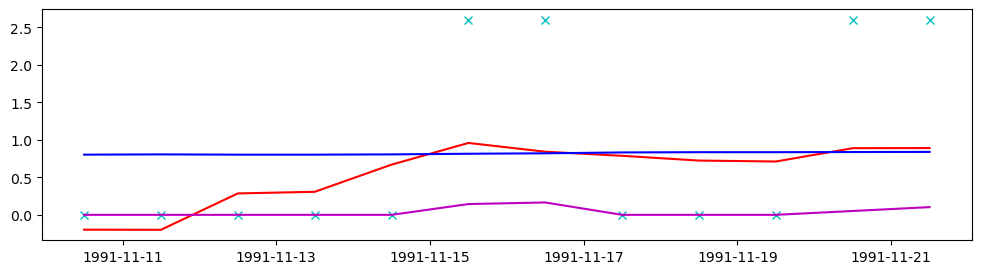

In [24]:
count=0
for ist, ien, II in zip(indstarts,indends,Int):
    i0=max(ist-5,0)
    i1=min(ien+5,len(tobs))
    fig,ax=plt.subplots(1,1,figsize=(12,3))
    ax.plot(tobs[i0:i1],sstan['obs','sm','nod'].values[i0:i1],'r-',label='anomally')
    ax.plot(tobs[i0:i1],np.array([Q['obs','sm','nod'][iyd-1] for iyd in ydobs])[i0:i1],'b-',label='threshold')
    ax.plot(tobs[i0:i1],2.6*mhw['obs','sm','nod'].values[i0:i1],'cx',label='isMHW?')
    ax.plot(tobs[i0:i1],cIntObs[i0:i1],'m-',label='Intensity')
    count=count+1
    if count>10: break

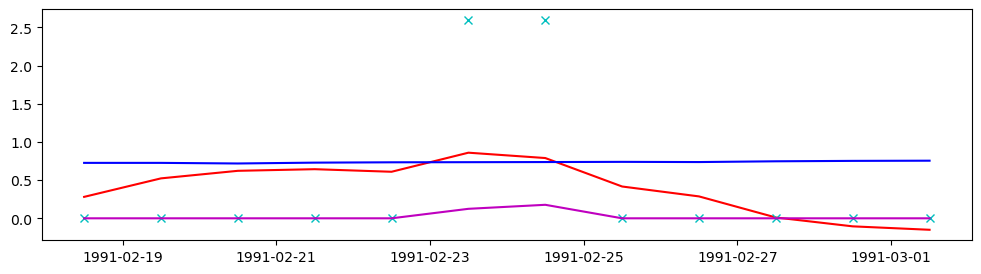

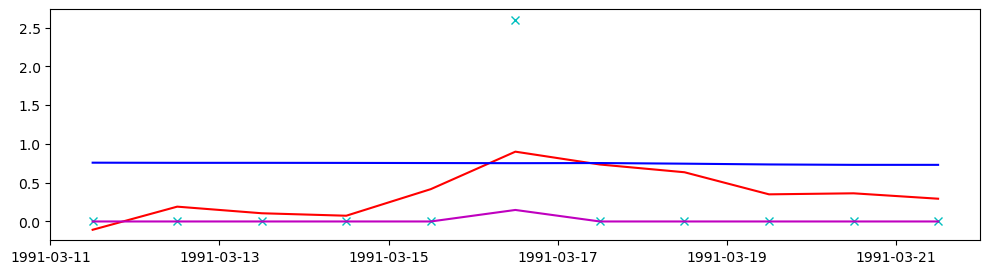

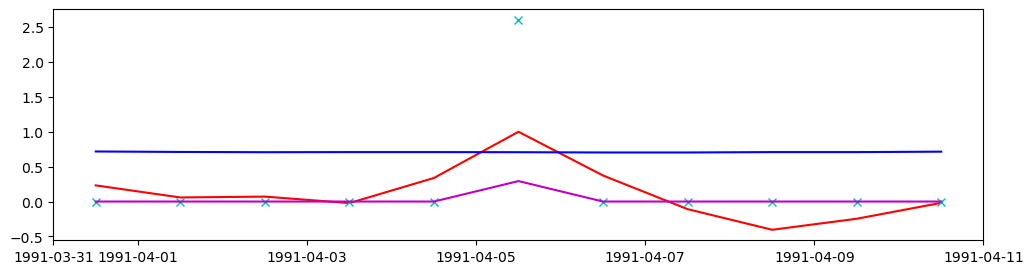

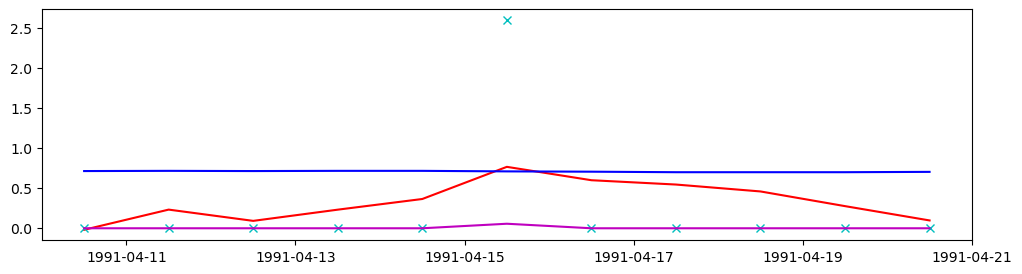

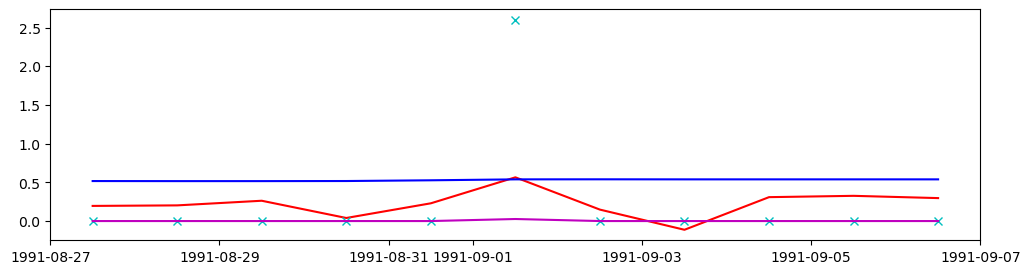

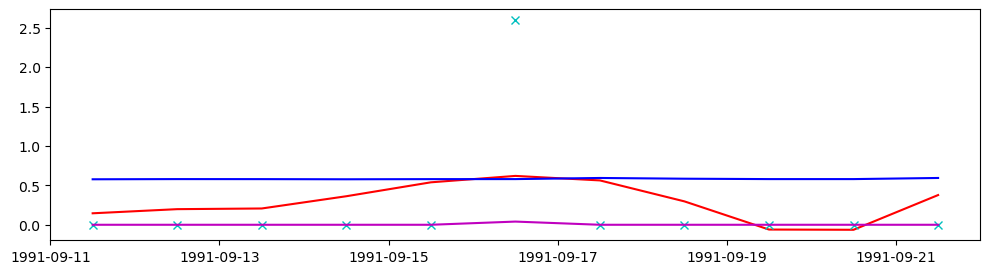

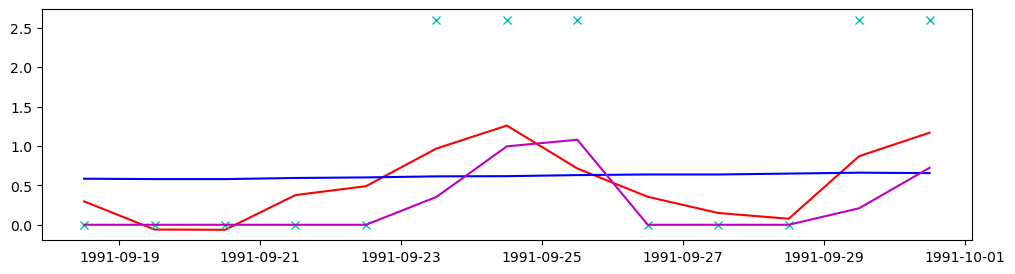

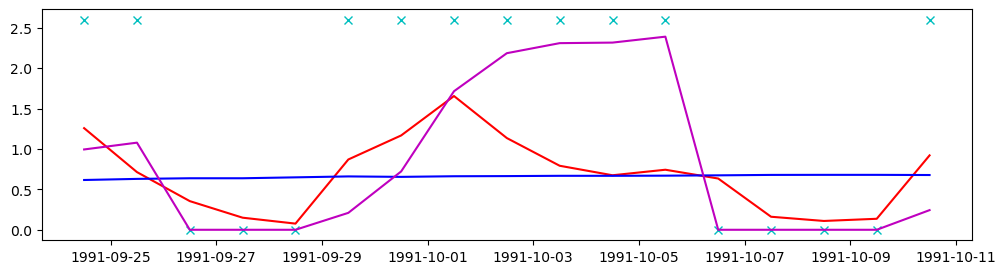

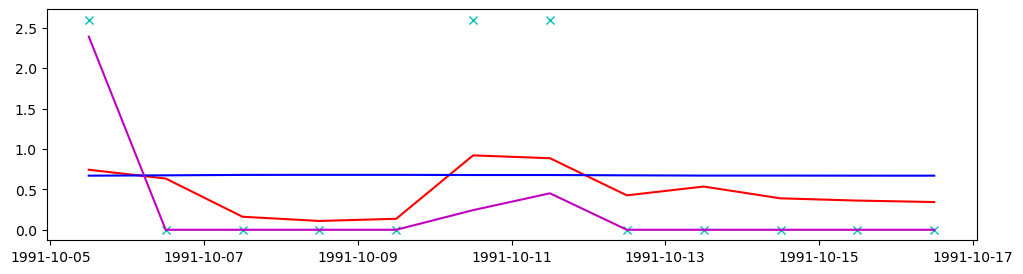

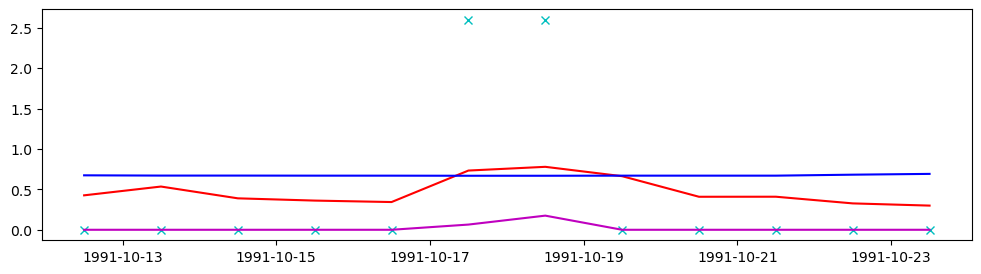

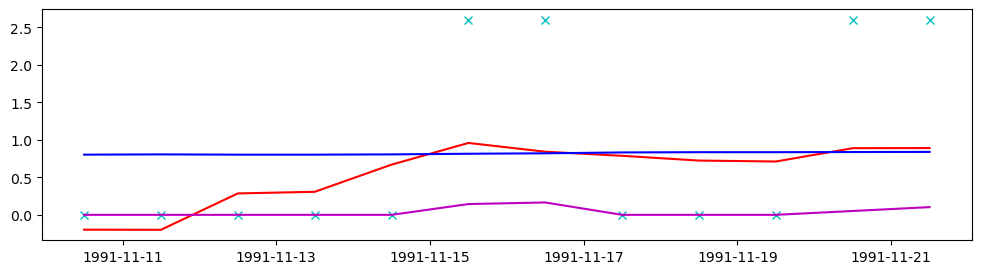

In [46]:
count=0
for ist, ien, II in zip(indstarts,indends,Int):
    i0=max(ist-5,0)
    i1=min(ien+5,len(tobs))
    fig,ax=plt.subplots(1,1,figsize=(12,3))
    ax.plot(tobs[i0:i1],sstan['obs','sm','nod'].values[i0:i1],'r-',label='anomally')
    ax.plot(tobs[i0:i1],np.array([Q['obs','sm','nod'][iyd-1] for iyd in ydobs])[i0:i1],'b-',label='threshold')
    ax.plot(tobs[i0:i1],2.6*mhw['obs','sm','nod'].values[i0:i1],'cx',label='isMHW?')
    ax.plot(tobs[i0:i1],cIntObs[i0:i1],'m-',label='Intensity')
    count=count+1
    if count>10: break

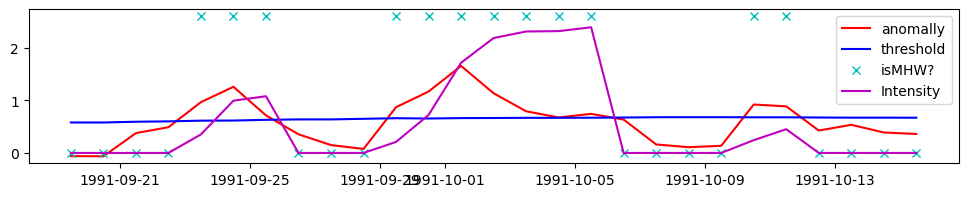

In [50]:
count=0
for ist, ien, II in zip(indstarts,indends,Int):
    if count==7:
        i0=max(ist-10,0)
        i1=min(ien+10,len(tobs))
        fig,ax=plt.subplots(1,1,figsize=(12,2))
        ax.plot(tobs[i0:i1],sstan['obs','sm','nod'].values[i0:i1],'r-',label='anomally')
        ax.plot(tobs[i0:i1],np.array([Q['obs','sm','nod'][iyd-1] for iyd in ydobs])[i0:i1],'b-',label='threshold')
        ax.plot(tobs[i0:i1],2.6*mhw['obs','sm','nod'].values[i0:i1],'cx',label='isMHW?')
        ax.plot(tobs[i0:i1],cIntObs[i0:i1],'m-',label='Intensity')
        ax.legend()
    count=count+1
    if count>10: break

In [51]:
tobs[i0:i1]

array([datetime.datetime(1991, 9, 19, 12, 0),
       datetime.datetime(1991, 9, 20, 12, 0),
       datetime.datetime(1991, 9, 21, 12, 0),
       datetime.datetime(1991, 9, 22, 12, 0),
       datetime.datetime(1991, 9, 23, 12, 0),
       datetime.datetime(1991, 9, 24, 12, 0),
       datetime.datetime(1991, 9, 25, 12, 0),
       datetime.datetime(1991, 9, 26, 12, 0),
       datetime.datetime(1991, 9, 27, 12, 0),
       datetime.datetime(1991, 9, 28, 12, 0),
       datetime.datetime(1991, 9, 29, 12, 0),
       datetime.datetime(1991, 9, 30, 12, 0),
       datetime.datetime(1991, 10, 1, 12, 0),
       datetime.datetime(1991, 10, 2, 12, 0),
       datetime.datetime(1991, 10, 3, 12, 0),
       datetime.datetime(1991, 10, 4, 12, 0),
       datetime.datetime(1991, 10, 5, 12, 0),
       datetime.datetime(1991, 10, 6, 12, 0),
       datetime.datetime(1991, 10, 7, 12, 0),
       datetime.datetime(1991, 10, 8, 12, 0),
       datetime.datetime(1991, 10, 9, 12, 0),
       datetime.datetime(1991, 10,

(array([  2.,   3.,   6.,  13.,  50., 102.,  73.,  24.,   9.,   3.]),
 array([-9.69696079, -8.26623336, -6.83550593, -5.40477849, -3.97405106,
        -2.54332363, -1.1125962 ,  0.31813124,  1.74885867,  3.1795861 ,
         4.61031353]),
 <BarContainer object of 10 artists>)

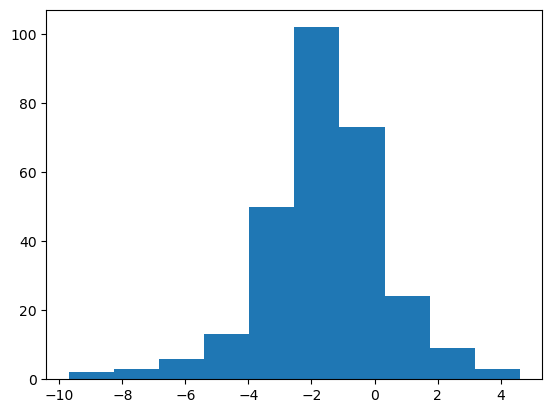

In [26]:
plt.hist(np.log(Int))

In [27]:
Int[1],indstarts[1],indends[1]

(np.float64(0.14838622283935288), np.int64(74), np.int64(75))

In [28]:
np.mean(MHWdurs)

np.float64(4.838596491228071)

In [29]:
indstarts2,indends2,MHWdurs2=calcdur(mhw['obs','sm','nod'],2,2)

In [30]:
indstarts2,indends2,MHWdurs2

(array([   53,   265,   271,   282,   289,   318,   323,   341,   354,
          368,   385,   393,   419,   433,   464,   476,   481,   530,
          830,   865,   872,   888,   894,   902,   933,   944,   986,
          993,  1016,  1026,  1065,  1073,  1078,  1115,  1156,  1167,
         1194,  1208,  1217,  1236,  1245,  1342,  1359,  1368,  1384,
         1476,  1610,  1617,  1682,  2420,  2431,  2448,  2474,  2480,
         2502,  2547,  2557,  2604,  2612,  2641,  2653,  2663,  2694,
         2699,  2706,  2710,  2722,  2727,  2758,  3368,  3709,  4156,
         4399,  4411,  4434,  4443,  4461,  4553,  4568,  4675,  4707,
         4750,  4849,  4935,  4951,  4972,  4976,  5041,  5064,  5081,
         5090,  5112,  5124,  5238,  5255,  5287,  5309,  5324,  5332,
         5357,  5828,  6067,  6867,  6874,  6879,  6893,  6914,  6937,
         6942,  6955,  6963,  6984,  6989,  7010,  7019,  7791,  7798,
         7833,  7846,  7882,  7890,  7903,  7927,  7949,  7964,  7980,
      

In [31]:
np.mean(MHWdurs2)

np.float64(7.654761904761905)

In [32]:
indstarts3,indends3,MHWdurs3=calcdur(mhw['obs','sm','nod'],3,3)

In [33]:
np.mean(MHWdurs3)

np.float64(12.655555555555555)

In [34]:
len(MHWdurs),len(MHWdurs2),len(MHWdurs3)

(285, 168, 90)

In [35]:
#intensity 1: sum of anom minus quantile difference over MHW duration

In [36]:
mhwr['mod','sm','nod']

<xarray.DataArray 'isMHW' (lead: 100, reftime: 378, r: 20)> Size: 6MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 1., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.]],

       [[1., 1., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 1.],
        ...,
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 1., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 1.],
        ...,
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 1., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.]]], shape=(100, 378, 20))
Coordinates:
    leadtime  (lead) float64 800B 15.0 39.0 63.0 ... 2.367e+03 2.391e+03
  * reftime   (reftime) int64 3kB 0 31 59 90 120 ... 11382 11413 11443 11474
  * r         (r) int64 160B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
    lat       float64 8B -9.5
    lon       float64 8B 215.5
Dimensions without coordinates: lead

In [37]:
mhwr['mod','sm','nod'].reftime

<xarray.DataArray 'reftime' (reftime: 378)> Size: 3kB
array([    0,    31,    59, ..., 11413, 11443, 11474], shape=(378,))
Coordinates:
  * reftime  (reftime) int64 3kB 0 31 59 90 120 ... 11382 11413 11443 11474
    lat      float64 8B -9.5
    lon      float64 8B 215.5
Attributes:
    units:     days since 1993-01-01 00:00:00
    calendar:  proleptic_gregorian

In [38]:
iss={}
iee={}
MHWdurM={}
Ints={}
irt=0
for ir in range(0,20):
    iss[ir],iee[ir],MHWdurM[ir]=calcdur(mhwr['mod','sm','nod'].isel(reftime=irt,r=ir).values)
    startmonth=irt%12
    Ints[ir]=eventIntens(iss[ir],iee[ir],Q['mod','sm','nod'].isel(month=startmonth,lead=slice(0,100)).values,sstan['mod','sm','nod'].isel(reftime=irt,r=ir,lead=slice(0,100)).values)

In [39]:
Ints[1]

[np.float64(0.049030962642564124),
 np.float64(0.5834845738933355),
 np.float64(8.378809045274636)]

In [40]:
cIntMod={}
for ir in range(0,20):
    cIntMod[ir]=cumEventIntens(Q['mod','sm','nod'].isel(month=startmonth,lead=slice(0,100)).values,sstan['mod','sm','nod'].isel(reftime=irt,r=ir,lead=slice(0,100)).values,mhwr['mod','sm','nod'].isel(reftime=irt,r=ir,lead=slice(0,100)).values)

In [41]:
tmod=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fMHW['mod','sm','nod'].reftime.values[irt]))+\
    np.array([dt.timedelta(hours=float(ii)) for ii in fMHW['mod','sm','nod'].lead.values[:100]])

(np.float64(8401.0), np.float64(8405.125))

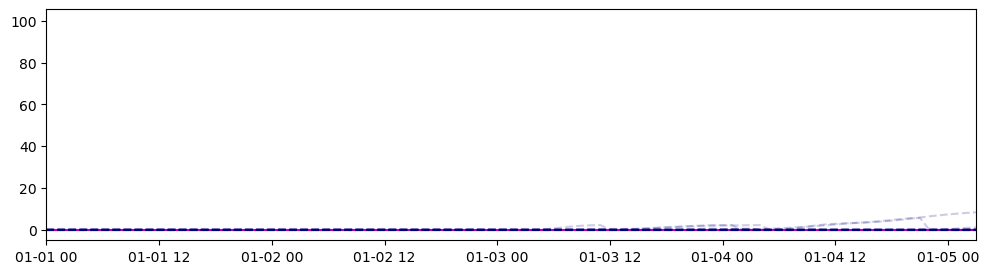

In [42]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tobs,cIntObs,'m-')
for ir in range(0,20):
    ax.plot(tmod,cIntMod[ir],'--',color='navy',alpha=.2)
ax.set_xlim(tmod[0],tmod[-1])

In [43]:
iss={}
iee={}
MHWdurM={}
Ints={}
cIntMod={}
tmod={}
for irt in range(0,11):
    tmod[irt]=dt.datetime(1993,1,1,0)+dt.timedelta(days=float(fMHW['mod','sm','nod'].reftime.values[irt]))+\
                np.array([dt.timedelta(hours=float(ii)) for ii in fMHW['mod','sm','nod'].lead.values[:100]])
    for ir in range(0,20):
        iss[irt,ir],iee[irt,ir],MHWdurM[irt,ir]=calcdur(mhwr['mod','sm','nod'].isel(reftime=irt,r=ir).values)
        startmonth=irt%12
        Ints[irt,ir]=eventIntens(iss[irt,ir],iee[irt,ir],Q['mod','sm','nod'].isel(month=startmonth,lead=slice(0,100)).values,
                             sstan['mod','sm','nod'].isel(reftime=irt,r=ir,lead=slice(0,100)).values)
        cIntMod[irt,ir]=cumEventIntens(Q['mod','sm','nod'].isel(month=startmonth,lead=slice(0,100)).values,
                                   sstan['mod','sm','nod'].isel(reftime=irt,r=ir,lead=slice(0,100)).values,
                                   eventInd(iss[irt,ir],iee[irt,ir],100))

(0.0, 30.0)

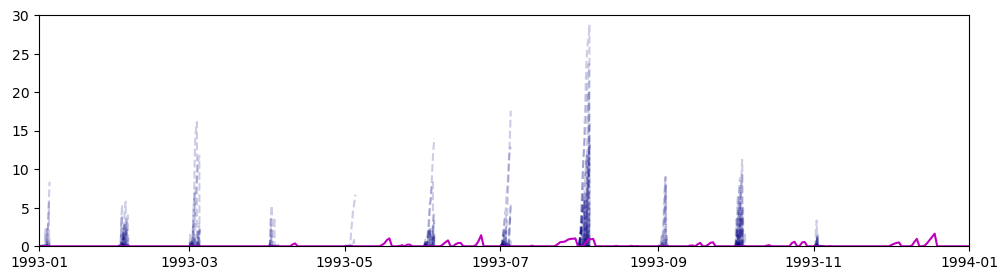

In [44]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
for irt in range(0,11):
    for ir in range(0,20):
        ax.plot(tmod[irt],cIntMod[irt,ir],'--',color='navy',alpha=.2)
ax.plot(tobs,cIntObs,'m-')
ax.set_xlim(dt.datetime(1993,1,1),dt.datetime(1994,1,1))
ax.set_ylim(0,30)